<img src="../img/viu_logo.png" width="200">

## 04EPPY - Actividad 2

25% de la Nota Final

### Fecha Entrega
- Convocatoria 1 - 10/09/2021
- Convocatoria 2 - 06/10/2021

### Instrucciones:
- Crear un notebook de Python3 que servirá como entrega de la actividad.
- Separar bien los apartados propuestos con celdas Markdown.
- Mantener una estructura limpia, comentando código y secuenciando los apartados con el código correspondiente que resuelva la actividad.
- Como criterio de evaluación se tendrá en cuenta el resultado, la consecución del mismo, estilo, comentarios y adecuación.
- No está permitido compartir los resultados ni el código en ninguno de los foros. 

### Entrega:
- Un solo documento en formato notebook: .ipynb
- Para hacer la entrega hay que hacer un tag al repositorio en una fecha anterior a la fecha de entrega de la actividad, y pegar el enlace al tag del repositorio en la actividad de blackboard.

# Olympics

### A1 - Leer Datasets - 10%
- En Kaggle existen dos datasets sobre las olimpiadas modernas
  - Atletas y resultados de medallas, desde 1896 a 2016, https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results
  - Resultados de atletismo, desde 1896 a 2016, https://www.kaggle.com/jayrav13/olympic-track-field-results
  
- Obtener y leer los ficheros csv en dataframes de pandas

In [1]:
#importamos las librerías
import numpy as np
import pandas as pd
import requests
from pandas import DataFrame


#Lectura y almacenamiento de datos desde la URL

#Resultados en los últimos 120 años
url1 = '../src/athlete_events.csv'
events = pd.read_csv(url1, sep=',', warn_bad_lines=True, error_bad_lines=False)

#Pruebas olímpicas y resultados
url2 = '../src/results.csv'
results = pd.read_csv(url2, sep=',', warn_bad_lines=True, error_bad_lines=False)

#Impresión de los ficheros completos
print(events)
print('\n')
print(results)

            ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1          

b'Skipping line 156: expected 8 fields, saw 9\nSkipping line 157: expected 8 fields, saw 9\nSkipping line 158: expected 8 fields, saw 9\nSkipping line 317: expected 8 fields, saw 9\nSkipping line 318: expected 8 fields, saw 9\nSkipping line 319: expected 8 fields, saw 9\nSkipping line 1658: expected 8 fields, saw 9\nSkipping line 1659: expected 8 fields, saw 9\nSkipping line 1660: expected 8 fields, saw 9\nSkipping line 1784: expected 8 fields, saw 9\nSkipping line 1785: expected 8 fields, saw 9\nSkipping line 1786: expected 8 fields, saw 9\n'


### A2 - Análisis - 45%
- Obtener un gráfico de barras con la evolución del número de deportes por año, eje X años, eje Y número de deportes
![sports_per_year](res/sports_per_year.png)
- Gráfico con la evolución de la participación femenina en las olimpiadas a lo largo de la historia, eje X años, eje Y número de atletas, para cada año una barra para cada sexo
![sex](res/sex.png)
- Gráfico con los 50 paises con más medallas en toda la historia, en cada barra el nombre completo del pais, longitud de cada barra, total de medallas obtenidas por pais
![medallero](res/medallero.png)

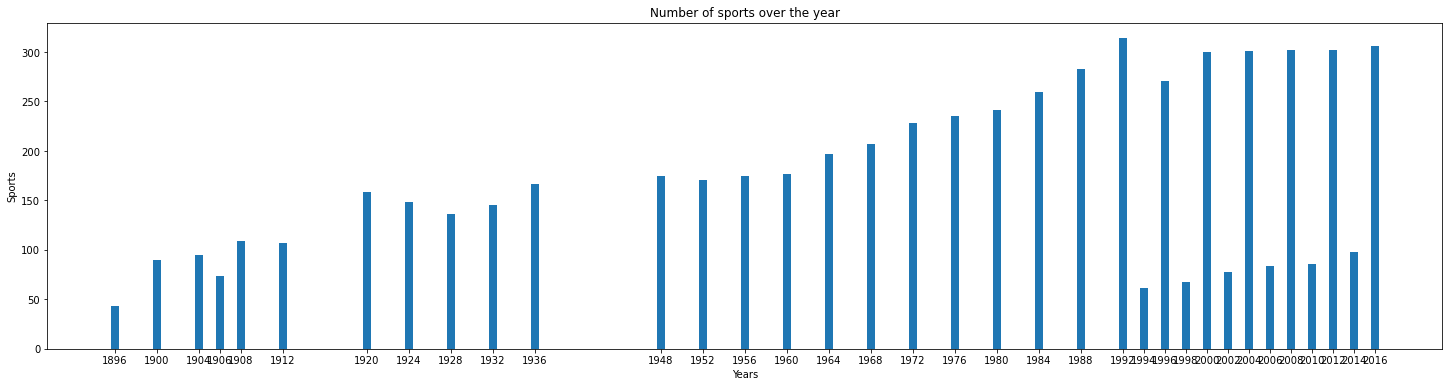

In [2]:
#importamos matoplib
import matplotlib.pyplot as plt

#obtener los datos del Dataframe
years = np.sort(events['Year'].unique())    
sports_per_year = []
for i in range (len(years)):
    sports_per_year.append(len(events[events['Year'] == years[i]]['Event'].unique()))
    
# Obtener un gráfico de barras con la evolución del número de deportes por año, eje X años, eje Y número de deportes

#Damos título al Gráfico

#Creamos la grafica de barras utilizando 'Years' como eje X y 'Number of Sports' como eje y.


plt.figure(figsize = (25,6))
plt.bar(years, sports_per_year)
plt.title('Number of sports over the year')

plt.xticks(years, years)
plt.xlabel('Years')
plt.ylabel('Sports')

#Finalmente mostramos la grafica con el metodo show()
plt.show()


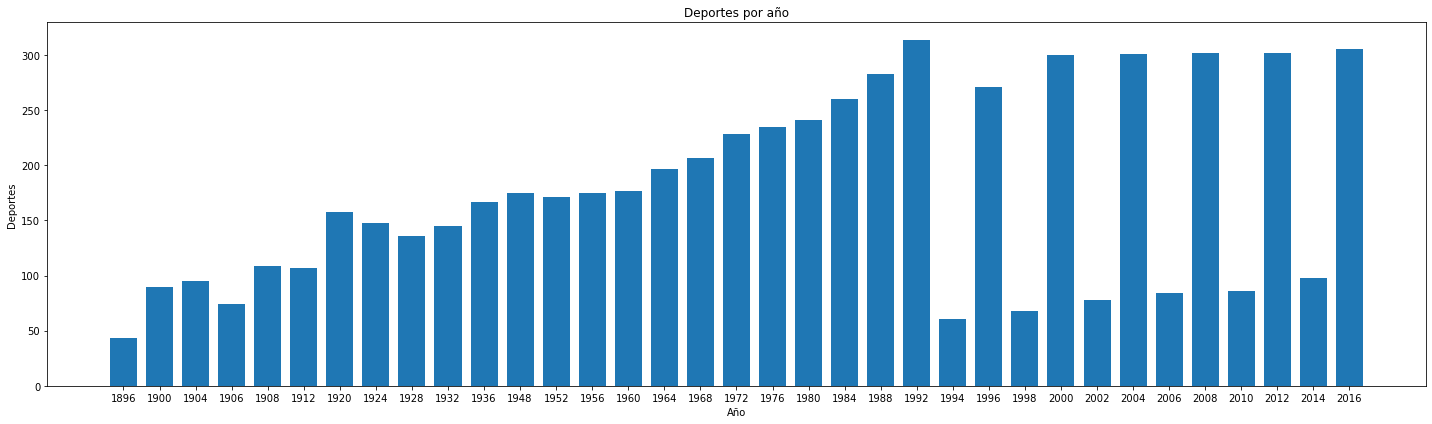

In [3]:
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(20)
rects1 = ax.bar(np.arange(len(years)), sports_per_year, width=0.75, label=None)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Deportes')
ax.set_title('Deportes por año')
ax.set_xticks(np.arange(len(years)))
ax.set_xticklabels(years)
ax.set_xlabel('Año')

fig.tight_layout()

plt.show()

In [4]:
# Gráfico con la evolución de la participación femenina en las olimpiadas a lo largo de la historia, eje X años, eje Y número de atletas, para cada año una barra para cada sexo

#Extraigo los valores del dataframe ordenados por sexo
df_athlete_by_sex = events.sort_values('Sex')

#Chicos
M_athletes = df_athlete_by_sex['Sex'] == 'M'
Male = df_athlete_by_sex[M_athletes]
print('\n')

#Chicas
F_athletes = df_athlete_by_sex['Sex'] == 'F'
Female = df_athlete_by_sex[F_athletes]
print('\n')




In [5]:
Male_1896 = Male[Male['Year']==1904]
print(len(Male_1896['Name'].unique()))

n_male = []
for i in range(len(years)):
    n_male.append(len(Male[Male['Year']==years[i]]['Name'].unique()))

print(n_male)
print(type(n_male))

Female_1896 = Female[Female['Year']==1904]
print(len(Female_1896['Name'].unique()))

n_female = []
for i in range(len(years)):
    n_female.append(len(Female[Female['Year']==years[i]]['Name'].unique()))

print(n_female)
print(type(n_female))

644
[176, 1197, 644, 835, 1980, 2356, 2597, 3396, 3362, 1952, 4697, 4545, 4992, 3650, 5255, 5346, 5717, 6845, 5704, 4965, 6213, 7349, 7967, 1216, 6814, 1390, 6576, 1512, 6252, 1539, 6284, 1503, 5858, 1642, 6143]
<class 'list'>
6
[0, 23, 6, 6, 44, 53, 78, 169, 340, 222, 441, 523, 629, 516, 757, 880, 994, 1266, 1490, 1358, 1844, 2512, 3206, 522, 3512, 788, 4064, 885, 4288, 955, 4603, 1032, 4646, 1102, 5031]
<class 'list'>


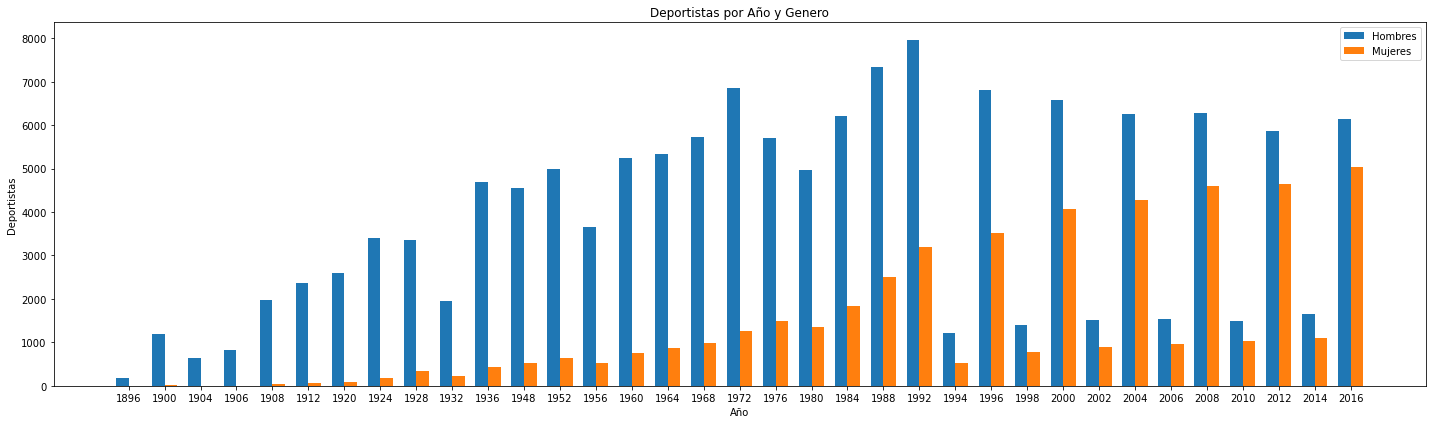

In [6]:
x = np.arange(len(years))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(20)
rects1 = ax.bar(x - width/2, n_male, width, label='Hombres')
rects2 = ax.bar(x + width/2, n_female, width, label='Mujeres')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Deportistas')
ax.set_title('Deportistas por Año y Genero')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.set_xlabel('Año')
ax.legend()

fig.tight_layout()

plt.show()

In [7]:
#Gráfico con los 50 paises con más medallas en toda la historia, en cada barra el nombre completo del pais, longitud de cada barra, total de medallas obtenidas por pais 

#extraigo los valores ordenados por paises

#d_countries = events.sort_values('NOC')
nocs = np.sort(events['NOC'].unique()) 
print(nocs)

usa = events[events['NOC'] == 'USA']
#print(usa)


usa2 = usa.dropna(axis=0, subset=['Medal'])
print(len(usa2.index))
#print(usa2)

#Ahora filtrar por año y deporte
usa3 = usa2.groupby(['Games', 'Event'])
#print(usa2)

aaa = usa2.groupby(['Games', 'Event'])['Medal'].nunique()
print(sum(aaa))


#df.drop(df[df['C']==True].index)
#creamos diccionario con medallas por cada pais





['AFG' 'AHO' 'ALB' 'ALG' 'AND' 'ANG' 'ANT' 'ANZ' 'ARG' 'ARM' 'ARU' 'ASA'
 'AUS' 'AUT' 'AZE' 'BAH' 'BAN' 'BAR' 'BDI' 'BEL' 'BEN' 'BER' 'BHU' 'BIH'
 'BIZ' 'BLR' 'BOH' 'BOL' 'BOT' 'BRA' 'BRN' 'BRU' 'BUL' 'BUR' 'CAF' 'CAM'
 'CAN' 'CAY' 'CGO' 'CHA' 'CHI' 'CHN' 'CIV' 'CMR' 'COD' 'COK' 'COL' 'COM'
 'CPV' 'CRC' 'CRO' 'CRT' 'CUB' 'CYP' 'CZE' 'DEN' 'DJI' 'DMA' 'DOM' 'ECU'
 'EGY' 'ERI' 'ESA' 'ESP' 'EST' 'ETH' 'EUN' 'FIJ' 'FIN' 'FRA' 'FRG' 'FSM'
 'GAB' 'GAM' 'GBR' 'GBS' 'GDR' 'GEO' 'GEQ' 'GER' 'GHA' 'GRE' 'GRN' 'GUA'
 'GUI' 'GUM' 'GUY' 'HAI' 'HKG' 'HON' 'HUN' 'INA' 'IND' 'IOA' 'IRI' 'IRL'
 'IRQ' 'ISL' 'ISR' 'ISV' 'ITA' 'IVB' 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ'
 'KIR' 'KOR' 'KOS' 'KSA' 'KUW' 'LAO' 'LAT' 'LBA' 'LBR' 'LCA' 'LES' 'LIB'
 'LIE' 'LTU' 'LUX' 'MAD' 'MAL' 'MAR' 'MAS' 'MAW' 'MDA' 'MDV' 'MEX' 'MGL'
 'MHL' 'MKD' 'MLI' 'MLT' 'MNE' 'MON' 'MOZ' 'MRI' 'MTN' 'MYA' 'NAM' 'NBO'
 'NCA' 'NED' 'NEP' 'NFL' 'NGR' 'NIG' 'NOR' 'NRU' 'NZL' 'OMA' 'PAK' 'PAN'
 'PAR' 'PER' 'PHI' 'PLE' 'PLW' 'PNG' 'POL' 'POR' 'P

In [8]:
total_medals = events.dropna(axis=0, subset=['Medal'])
#medals_per_country = total_medals.groupby(['NOC', 'Games', 'Event'])['Medal'].unique()
#print(medals_per_country)

afg = total_medals.groupby(['NOC', 'Games'])['Event', 'Medal']
print(afg)

#print(medals_per_country.)

<ipython-input-8-8a6f9bd097d2>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  afg = total_medals.groupby(['NOC', 'Games'])['Event', 'Medal']


In [22]:
asd = total_medals[total_medals['NOC']=='ESP']
print(sum(asd.groupby(['Games', 'Event'])['Medal'].nunique()))

#Eso ya te da el numero de medallas por pais

#Ahora hay que hacer un filtro para sacar los 50 paises con mas medallas, para añadirlo al array el numero y en otro array el pais

medals_50 = []
nocs_50 = []
for i in range(len(nocs)):
    aux_noc = total_medals[total_medals['NOC']==nocs[i]]
    aux_med = sum(aux_noc.groupby(['Games', 'Event'])['Medal'].nunique())
    #print(nocs[i] + ': ' + str(aux_med))
    if (len(medals_50) == 0):
        nocs_50.append(nocs[i])
        medals_50.append(aux_med)
    else:
        for j in range(len(medals_50)):
            #if((aux_med > medals_50[j]) and (aux_med < medals_50[j-1])):
            
            #if ()
    
print(medals_50)
print(nocs_50)
#https://www.w3schools.com/python/python_ref_list.asp

150
[2]
['AFG']


### A3 - Machine Learning - 45%

- Crear un modelo capaz de predecir el tiempo que va a hacer un atleta en la prueba de los 100 metros lisos, en función de su edad, sexo, peso y altura.
![model](res/model.png)

In [10]:
#https://www.w3schools.com/python/python_ml_getting_started.asp